## Figures

Make figures for the markov motion correction project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/home/jenna/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
baseDir = '/home/jenna/Research/CHP-PIRC/markov-movement-correction/0003_MR1_18991230_000000EP2DBOLDLINCONNECTIVITYs004a001/'

## Defining the Color Palette

Use seaborn to define the color palette for all figure generating functions

In [4]:
def defineColorPalette():
    """
    Use the seaborn library to define a better looking color palette.
    
    Currently takes no inputs, but that might change as I make more
    palettes
    
    Returns:
    - palette: the seaborn palette defined
    """
    # try using the xkcd_rgb colors
    # want 6 colors
    colors = ['blue', 'cherry red', 'golden yellow', 'vibrant green', 'violet', 'pumpkin orange']
    palette = sns.xkcd_palette(colors)
    
    return palette

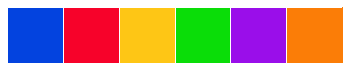

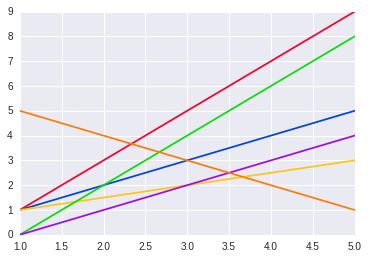

In [5]:
palette = defineColorPalette()
sns.palplot(palette)

# test plot
x = [1, 2, 3, 4, 5]
y1 = [1, 2, 3, 4, 5]
y2 = [1, 3, 5, 7, 9]
y3 = [1, 1.5, 2, 2.5, 3]
y4 = [0, 2, 4, 6, 8]
y5 = [0, 1, 2, 3, 4]
y6 = [5, 4, 3, 2, 1]

fig = plt.figure()
sns.set_palette(palette)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.plot(x, y5)
plt.plot(x, y6)
plt.show()

## Similarity Metrics for Registration

- Correlation Ratio
- Mutual Information

In [6]:
def plotTimeseriesSimilarities(timepoints, preReg, 
                               hmm, stackingHmm, signal4,
                               title='', ylabel='Similarity Metric',
                               simLabels=[], outFn=''):
    """
    Plot the similarity metric for each time point image to the
    template image for pre and post registration.
    
    The metrics are calculated using Raf's similarity.sh script.
    (Uses flirt)
    
    Inputs:
    - timepoints: the timepoints in the image
    - preReg: alignment of the images before registration
    - hmm: alignment of the images after HMM movement correction
    - stackingHmm: alignment of the images post stacking HMM 
                   movement correction
    - title: title for the graph
    - labels: the labels for the different signals
    - outFn: filename for the output (optional, leave empty if you
             don't want to save)
    
    Effects:
    - builds a graph that shows the similarities of each timepoint 
      image to the template image
    """
    sns.set_style("white")
    fig = plt.figure()
    
    # set the palette
    palette = defineColorPalette()
    sns.set_palette(palette)
    
    # put signals on graph
    print(simLabels)
    l1, = plt.plot(timepoints, preReg, label=simLabels[0])
    l2, = plt.plot(timepoints, hmm, label=simLabels[1])
    l3, = plt.plot(timepoints, stackingHmm, label=simLabels[2])
    l4, = plt.plot(timepoints, signal4, label=simLabels[3])
    
    # put legend on graph
    plt.legend(handles=[l1, l2, l3, l4], loc=2)
    
    plt.title(title)
    plt.xlabel('Timepoints')
    plt.ylabel(ylabel)
    
    plt.show()

    # saving the plot as an image
    if not outFn == '':
        fig.savefig(outFn, bbox_inches='tight')

In [9]:
# load the data
timepoints_df = pd.read_csv(baseDir+'similarities_preregistration.csv')
stackingHmm_df = pd.read_csv(baseDir+'similarities_stacking_hmm.csv')
stackingHmmNonLinked_df = pd.read_csv(baseDir+'similarities_stacking_hmm_not_linked.csv')

# get the signals from the data
time = timepoints_df[list(timepoints_df)[0]].tolist()
preReg_CorrRatio = timepoints_df[list(timepoints_df)[1]].tolist()
preReg_MI = timepoints_df[list(timepoints_df)[2]].tolist()

regNA_CorrRatio = stackingHmm_df[list(stackingHmm_df)[1]].tolist()
regNA_MI = stackingHmm_df[list(stackingHmm_df)[2]].tolist()

marNA_CorrRatio = stackingHmmNonLinked_df[list(stackingHmmNonLinked_df)[1]].tolist()
marNA_MI = stackingHmmNonLinked_df[list(stackingHmmNonLinked_df)[2]].tolist()

# set up the labels
simLabels = ['No Correction', 'Stacking HMM Correction', 'Stacking HMM Correction (Not Linked)']

In [10]:
print(len(time))
print(len(marNA_MI))

150
150


['No Correction', 'Stacking HMM Correction', 'Stacking HMM Correction (Not Linked)']


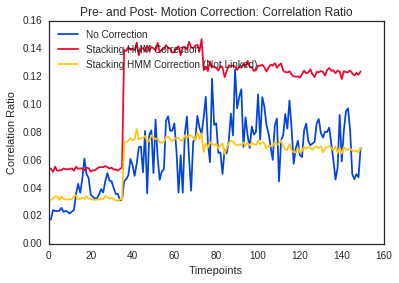

In [11]:
# plot the data - correlation ratio
plotTimeseriesSimilarities(time, preReg_CorrRatio, regNA_CorrRatio, 
                           marNA_CorrRatio,
                           title='Pre- and Post- Motion Correction: Correlation Ratio', 
                           ylabel='Correlation Ratio',
                           simLabels=simLabels)

['No Correction', 'Stacking HMM Correction', 'Stacking HMM Correction (Not Linked)']


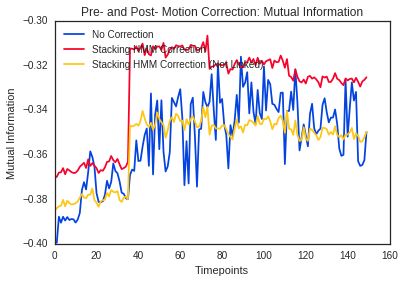

In [12]:
plotTimeseriesSimilarities(time, preReg_MI, regNA_MI, 
                           marNA_MI,
                           title='Pre- and Post- Motion Correction: Mutual Information', 
                           ylabel='Mutual Information',
                           simLabels=simLabels)

In [32]:
# load the data
timepoints_df = pd.read_csv(baseDir+'similarities_preregistration.csv')
hmm_df = pd.read_csv(baseDir+'similarities_hmm.csv')
prealign_df = pd.read_csv(baseDir+'similarities_prealigned.csv')
prealignHmm_df = pd.read_csv(baseDir+'similarities_prealign_hmm.csv')

# get the signals from the data
time = timepoints_df[list(timepoints_df)[0]].tolist()
preReg_CorrRatio = timepoints_df[list(timepoints_df)[1]].tolist()
preReg_MI = timepoints_df[list(timepoints_df)[2]].tolist()

hmm_CorrRatio = hmm_df[list(hmm_df)[1]].tolist()
hmm_MI = hmm_df[list(hmm_df)[2]].tolist()

prealign_CorrRatio = prealign_df[list(prealign_df)[1]].tolist()
prealign_MI = prealign_df[list(prealign_df)[2]].tolist()

prealignHmm_CorrRatio = prealignHmm_df[list(prealignHmm_df)[1]].tolist()
prealignHmm_MI = prealignHmm_df[list(prealignHmm_df)[2]].tolist()

# set up the labels
simLabels = ['No Correction', 'HMM Correction', 'Prealigned', 'Prealigned & HMM Corrected']

['No Correction', 'HMM Correction', 'Prealigned', 'Prealigned & HMM Corrected']


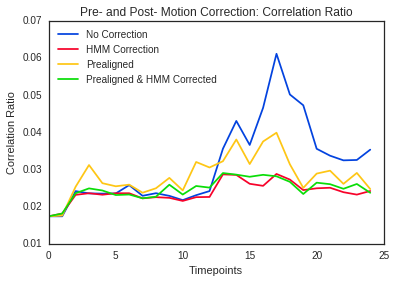

In [33]:
# plot the data - correlation ratio
plotTimeseriesSimilarities(time, preReg_CorrRatio, hmm_CorrRatio, 
                           prealign_CorrRatio, prealignHmm_CorrRatio,
                           title='Pre- and Post- Motion Correction: Correlation Ratio', 
                           ylabel='Correlation Ratio',
                           simLabels=simLabels)

['No Correction', 'HMM Correction', 'Prealigned', 'Prealigned & HMM Corrected']


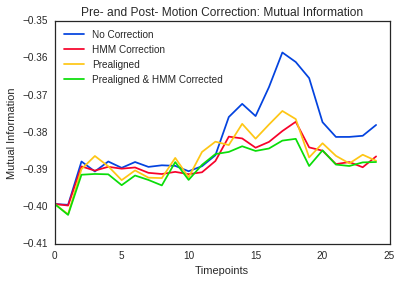

In [34]:
# plot the data - mutual information
plotTimeseriesSimilarities(time, preReg_MI, hmm_MI, 
                           prealign_MI, prealignHmm_MI,
                           title='Pre- and Post- Motion Correction: Mutual Information', 
                           ylabel='Mutual Information',
                           simLabels=simLabels)

### Figures from Testing

When I changed the transform file output from .h5 to .mat+.nii.gz, I found out that the registration sometimes performs an Affine transformation before the SyN. So I ran the hmm registration using the _0.nii.gz file and then using the _1.nii.gz file. Here's the metrics of the results

In [9]:
# load the data
timepoints_df = pd.read_csv(baseDir+'testing_similarities_preregistration.csv')
df0 = pd.read_csv(baseDir+'testing_similarities_0.csv')
df1 = pd.read_csv(baseDir+'testing_similarities_1.csv')

# get the signals from the data
time = timepoints_df[list(timepoints_df)[0]].tolist()
preReg_CorrRatio = timepoints_df[list(timepoints_df)[1]].tolist()
preReg_MI = timepoints_df[list(timepoints_df)[2]].tolist()

corrRatio0 = df0[list(df0)[1]].tolist()
mi0 = df0[list(df0)[2]].tolist()

corrRatio1 = df1[list(df1)[1]].tolist()
mi1 = df1[list(df1)[2]].tolist()

placeholder = [0]*25
# set up the labels
simLabels = ['No Correction', 'InverseWarp', 'Warp', ""]

len(time[:25])

25

['No Correction', 'InverseWarp', 'Warp', '']


/home/jenna/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:506: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f25f142e150> has a label of u'_line3' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


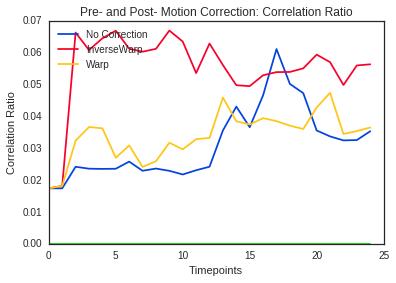

In [10]:
# plot the data - correlation ratio
plotTimeseriesSimilarities(time[:25], preReg_CorrRatio[:25], corrRatio0, 
                           corrRatio1, placeholder,
                           title='Pre- and Post- Motion Correction: Correlation Ratio', 
                           ylabel='Correlation Ratio',
                           simLabels=simLabels)

['No Correction', 'InverseWarp', 'Warp', '']


/home/jenna/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:506: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f25f13042d0> has a label of u'_line3' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


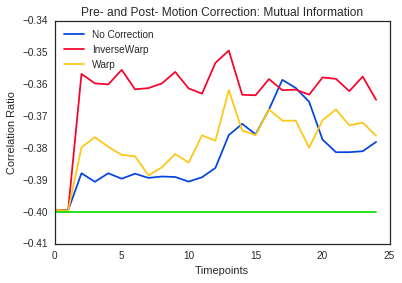

In [11]:
# plot the data - mutual information
plotTimeseriesSimilarities(time[:25], preReg_MI[:25], mi0, 
                           mi1, [-.4]*25,
                           title='Pre- and Post- Motion Correction: Mutual Information', 
                           ylabel='Correlation Ratio',
                           simLabels=simLabels)

### Stacking HMM Test

In [13]:
# load the data
timepoints_df = pd.read_csv(baseDir+'testing_similarities_preregistration.csv')
df0 = pd.read_csv(baseDir+'testing_similarities_hmm.csv')
df1 = pd.read_csv(baseDir+'testing_similarities_stackinghmm.csv')


# get the signals from the data
time = timepoints_df[list(timepoints_df)[0]].tolist()
preReg_CorrRatio = timepoints_df[list(timepoints_df)[1]].tolist()
preReg_MI = timepoints_df[list(timepoints_df)[2]].tolist()

corrRatio0 = df0[list(df0)[1]].tolist()
mi0 = df0[list(df0)[2]].tolist()

corrRatio1 = df1[list(df1)[1]].tolist()
mi1 = df1[list(df1)[2]].tolist()

placeholder = [0]*25
# set up the labels
simLabels = ['No Correction', 'HMM', 'Stacking HMM', ""]

len(time[:25])

25

['No Correction', 'HMM', 'Stacking HMM', '']


/home/jenna/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:506: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f4fd15868d0> has a label of u'_line3' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


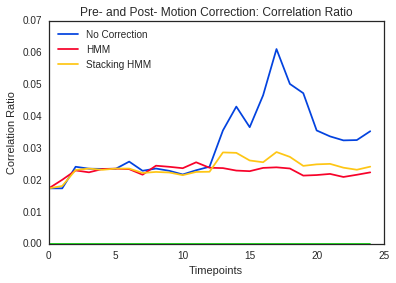

In [16]:
# plot the data - correlation ratio
plotTimeseriesSimilarities(time[:25], preReg_CorrRatio[:25], corrRatio0[:25], 
                           corrRatio1, placeholder,
                           title='Pre- and Post- Motion Correction: Correlation Ratio', 
                           ylabel='Correlation Ratio',
                           simLabels=simLabels)

['No Correction', 'HMM', 'Stacking HMM', '']


/home/jenna/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:506: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f4fce4a4d90> has a label of u'_line3' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


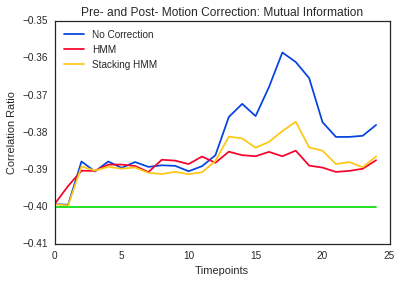

In [17]:
# plot the data - mutual information
plotTimeseriesSimilarities(time[:25], preReg_MI[:25], mi0[:25], 
                           mi1, [-.4]*25,
                           title='Pre- and Post- Motion Correction: Mutual Information', 
                           ylabel='Correlation Ratio',
                           simLabels=simLabels)